# Build  spectra for AuxTel

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : March 30th 2021
- creation update : March 31th 2021
- version v0


This notebook is to help for finding the position of order 0

# Imports

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib import  transforms
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re

plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [16]:
from iminuit import Minuit
import iminuit

In [17]:
iminuit.__version__

'2.2.0'

In [18]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.images import *
from scipy import ndimage, misc

In [19]:
from scipy.stats import kurtosis,skew
from scipy.stats import kurtosistest,skewtest,normaltest

# Path

In [20]:
path_auxtel="/sps/lsst/groups/auxtel"
path_spectractor=os.path.join(path_auxtel,"softs/github/desc/Spectractor")
path_spectractor_config=os.path.join(path_spectractor,"config")
path_images=os.path.join(path_auxtel,"data/2021/ronchi170lpmm/FlipCleans")

# Function

In [21]:
def file_target(filename):
    m=re.findall('^Cor_ronchi170lpmm_.*_(.*)_[0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*[.]fits$',filename)
    if len(m)>0:
        return m
    elif re.search('NGC4755',filename):
        return ['NGC4755']
    else:
        return []

# Logbook for file selection

In [22]:
filename_logbook='logbooks/auxtelronchi170lpmmlogbook_2021_v0.3.csv'

In [23]:
df=pd.read_csv(filename_logbook,index_col=0)

In [24]:
pd.set_option('display.max_rows', None)

In [25]:
df

,index,date,path,file,num,object,filter,disperser,airmass,exposure,...,temperature,humidity,windspd,Obj-posXpix,Obj-posYpix,Dx,Dy,skip,run,quality
0,0,2021-03-12T01:19:36.315,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_188...,188,HD75519,RG610,ronchi170lpmm,1.033813,5.0,...,11.7,50.0,0.9,NaN,NaN,NaN,NaN,,NaN,NaN
1,1,2021-03-12T01:20:18.220,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_189...,189,HD75519,RG610,ronchi170lpmm,1.033311,5.0,...,11.7,55.0,0.8,NaN,NaN,NaN,NaN,,NaN,NaN
2,2,2021-03-12T01:20:33.072,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_190...,190,HD75519,RG610,ronchi170lpmm,1.033136,5.0,...,11.7,55.0,0.8,NaN,NaN,NaN,NaN,,NaN,NaN
3,3,2021-03-12T01:52:19.566,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_200...,200,HD75519,RG610,ronchi170lpmm,1.017516,5.0,...,11.6,49.0,0.3,NaN,NaN,NaN,NaN,,NaN,NaN
4,4,2021-03-12T01:52:28.549,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_201...,201,HD75519,RG610,ronchi170lpmm,1.017474,5.0,...,11.6,49.0,0.3,NaN,NaN,NaN,NaN,,NaN,NaN
5,5,2021-03-12T01:52:38.095,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_202...,202,HD75519,RG610,ronchi170lpmm,1.017430,5.0,...,11.6,49.0,0.3,NaN,NaN,NaN,NaN,,NaN,NaN
6,6,2021-03-12T01:52:47.124,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_203...,203,HD75519,RG610,ronchi170lpmm,1.017389,5.0,...,11.6,49.0,0.3,NaN,NaN,NaN,NaN,,NaN,NaN
7,7,2021-03-12T02:00:08.356,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_204...,204,HD75519,RG610,ronchi170lpmm,1.015876,5.0,...,11.7,49.0,1.2,NaN,NaN,NaN,NaN,,NaN,NaN
8,8,2021-03-12T02:01:03.092,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_205...,205,HD75519,RG610,ronchi170lpmm,1.015722,5.0,...,11.8,50.0,0.3,NaN,NaN,NaN,NaN,,NaN,NaN
9,9,2021-03-12T02:01:12.571,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_206...,206,HD75519,RG610,ronchi170lpmm,1.015696,5.0,...,11.8,50.0,0.5,NaN,NaN,NaN,NaN,,NaN,NaN


# Selection of input file

In [26]:
myhome=os.getenv("HOME")

In [28]:
#dir_spectra="/Users/dagoret/DATA/AuxTelData2021/holo/FlipCleans"
#dir_images=os.path.join(myhome,"DATA/AuxTelData2021/ronchi170lpmm/FlipCleans")
dir_images=path_images

In [29]:
filename_image=df['file'][6]
filename_image

'Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_203.fits'

In [30]:
filename_image

'Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_203.fits'

In [31]:
file_target(filename_image)

['HD75519']

In [47]:
filename=os.path.join(dir_images,filename_image)
output_directory="./outputs_process_ronchi170lpmm"
output_figures="figures_process_ronchi170lpmm"
guess = [250,2600]
disperser_label = "ronchi170lpmm"
config = os.path.join(path_spectractor_config,"auxtel_quicklook.ini")
target = file_target(filename_image)[0]

In [48]:
if not os.path.isdir(output_directory):
    os.mkdir(output_directory)
if not os.path.isdir(output_figures):
    os.mkdir(output_figures)

# Configuration of the running mode

In [49]:
parameters.debug=True
parameters.verbose=True
parameters.display=True
parameters.LIVE_FIT=False

In [50]:
#parameters.DISPERSER_DIR = os.path.join(spectractor_dir, "extractor/dispersers/")
#parameters.CONFIG_DIR = os.path.join(spectractor_dir, "../config/")
#parameters.THROUGHPUT_DIR = os.path.join(spectractor_dir, "simulation/CTIOThroughput/")

# Load an image

In [51]:
image=Image(file_name=filename, target_label=target, disperser_label=disperser_label, config=config)

2021-06-08 17:16:16  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.372883073271957 but average of self.read_out_noise is 8.5.


## Show relevant parameters

In [52]:
parameters.OBS_NAME

'AUXTEL'

In [53]:
parameters.DISPERSER_DIR

'/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/extractor/dispersers/'

In [54]:
parameters.DISTANCE2CCD

174.9980010986328

In [55]:
parameters.LAMBDA_MIN 

563

In [56]:
parameters.LAMBDA_MAX 

1095

In [62]:
parameters.LSST_SAVEFIGPATH=True
parameters.LSST_SAVEFIGPATH=output_figures

In [63]:
image.filter_label

'RG610'

In [64]:
image.header["FILTER"]

'RG610'

In [65]:
#image.header

# Plot image and find the target position

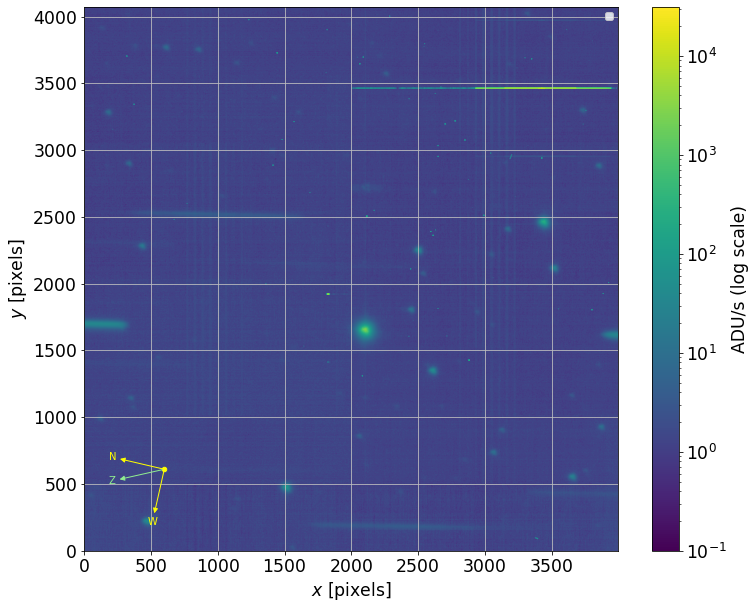

In [66]:
image.plot_image(figsize=(12, 10),scale="log")

In [67]:
filename_image

'Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_203.fits'

In [68]:
guess = [1800, 2500] # filename_image=df['file'][0] , Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_188.fits, moved truncated
guess = [1800, 2500] # filename_image=df['file'][1], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_189.fits, idem
guess = [1800, 2500] # filename_image=df['file'][2], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_190.fits, idem
guess = [2100, 1750] # filename_image=df['file'][3], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_200.fits, horrible
guess = [2100, 1750] # filename_image=df['file'][4], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_201.fits, bad not rec
guess = [2100, 1750] # filename_image=df['file'][5], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_202.fits bad not rec
guess = [2100, 1750] # filename_image=df['file'][6], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_203.fits bad not rec
guess = [200, 1700] # filename_image=df['file'][7], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_204.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][8], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_205.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][9], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_206.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][10], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_207.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][11], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_208.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][12], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_209.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][13], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_210.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][14], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_211.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][15], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_212.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][16], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_213.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][17], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_214.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][18], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_215.fits  Reconstruit 
guess = [100, 1700] # filename_image=df['file'][19], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_216.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][20], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_217.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][21], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_218.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][22], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_219.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][23], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_220.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][24], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_221.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][25], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_222.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][26], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_223.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][27], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_224.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][28], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_225.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][29], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_226.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][30], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_227.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][31], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_228.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][32], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_229.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][33], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_230.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][34], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_231.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][35], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_232.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][36], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_233.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][37], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_234.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][38], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_235.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][39], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_236.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][40], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_237.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][41], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_238.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][42], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_239.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][43], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_240.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][44], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_241.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][45], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_242.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][46], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_243.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][47], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_244.fits  trop au bord pas re
guess = [100, 1700] # filename_image=df['file'][48], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_245.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][49], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_246.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][50], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_247.fits  trop au bor
guess = [100, 1700] # filename_image=df['file'][51], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_248.fits  trop au bord pas recd pas rec
guess = [100, 1700] # filename_image=df['file'][52], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_249.fits  trop au bord pas recd pas rec
guess = [100, 1700] # filename_image=df['file'][53], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_250.fits  trop au bord pas recd pas rec
guess = [100, 1700] # filename_image=df['file'][54], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_251.fits  trop au bord pas recd pas rec
guess = [100, 1700] # filename_image=df['file'][55], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_252.fits  trop au bord pas recd pas rec
guess = [100, 1700] # filename_image=df['file'][56], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_253.fits  trop au bord pas recd pas rec
guess = [100, 1700] # filename_image=df['file'][57], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_254.fits  trop au bord pas recd pas rec
guess = [100, 1700] # filename_image=df['file'][58], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_255.fits  trop au bord pas recd pas rec
guess = [100, 1700] # filename_image=df['file'][59], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_256.fits  trop au bord pas recd pas rec
guess = [100, 1700] # filename_image=df['file'][60], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_257.fits  trop au bord pas recd pas rec
guess = [2200, 1700]# filename_image=df['file'][61], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_258.fits  trop au bord pas recd pas rec
guess = [100, 1700] # filename_image=df['file'][62], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_259.fits  trop au bord pas recd pas rec
guess = [200, 1700] # filename_image=df['file'][63], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_260.fits  REC
guess = [200, 1700] # filename_image=df['file'][64], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_261.fits  REC
guess = [300, 1800] # filename_image=df['file'][65], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_262.fits  bad foc, not rec
guess = [300, 1800] # filename_image=df['file'][66], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_263.fits  bad foc Not rec
guess = [300, 1800] # filename_image=df['file'][67], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_264.fits  bad foc Not rec
guess = [300, 1800] # filename_image=df['file'][68], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_265.fits  bad foc , REC
guess = [300, 1800] # filename_image=df['file'][69], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_266.fits  bad foc Not rec
guess = [250, 1800] # filename_image=df['file'][70], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_267.fits  very good foc REC
guess = [250, 1800] # filename_image=df['file'][71], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_268.fits  very good foc REC
guess = [250, 1800] # filename_image=df['file'][72], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_269.fits  very good foc REC
guess = [250, 1800] # filename_image=df['file'][73], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_270.fits  very good foc REC
guess = [250, 1800] # filename_image=df['file'][74], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_271.fits  very good foc REC
guess = [250, 1800] # filename_image=df['file'][75], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_272.fits  very good foc REC
guess = [250, 1800] # filename_image=df['file'][76], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_273.fits  very good foc REC
guess = [250, 1800] # filename_image=df['file'][77], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_274.fits  very good foc REC
guess = [250, 1800] # filename_image=df['file'][78], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_275.fits  very good foc REC
guess = [200, 1800] # filename_image=df['file'][79], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_276.fits  reconstruction plante ???
guess = [200, 1800] # filename_image=df['file'][80], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_277.fits  bien reconstruite
guess = [200, 1800] # filename_image=df['file'][81], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_278.fits  bien reconstruite
guess = [200, 1800] # filename_image=df['file'][82], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_279.fits  bien reconstruite
guess = [200, 1800] # filename_image=df['file'][83], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_280.fits  bien reconstruite
guess = [200, 1800] # filename_image=df['file'][84], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_281.fits  bien reconstruite
guess = [200, 1800] # filename_image=df['file'][85], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_282.fits  bien reconstruite





In [69]:
filename_image

'Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_203.fits'

2021-06-08 17:17:16  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0                c1_0                   c0_1        
    ----------------- ---------------------- ---------------------
    3.016427455197587 0.00030173465321923224 -0.014623544125469522
2021-06-08 17:17:17  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 4 iterations because the sum of parameter shift relative to the sum of the parameters is below xtol=1e-06.
2021-06-08 17:17:17  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 0 iterations because the sum of parameter shift relative to the sum of the parameters is below xtol=1e-06.


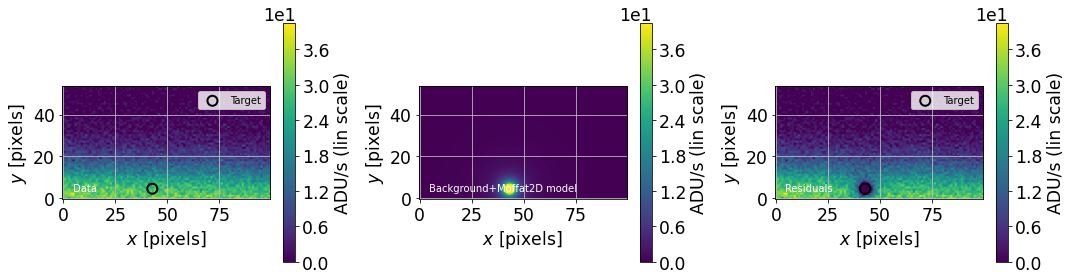

In [70]:

parameters.VERBOSE = True
parameters.DEBUG = True
x1, y1 = find_target(image, guess,rotated=False, use_wcs=False)

In [71]:
print(x1,y1)

151.7923129749736 1704.3366146909318


In [72]:
if x1>100:
    WID=100
else:
    WID=50
    

thumbnail=np.copy(image.data[int(y1)-WID:int(y1)+WID,int(x1)-WID:int(x1)+WID])
thumbnail_y=thumbnail.sum(axis=1)
thumbnail_x=thumbnail.sum(axis=0)
xx=np.linspace(int(x1)-WID,int(x1)+WID,len(thumbnail_x))
yy=np.linspace(int(y1)-WID,int(y1)+WID,len(thumbnail_y))
k0=kurtosis(thumbnail,axis=None,bias=True,fisher=True)
kx=kurtosis(thumbnail_x,bias=True,fisher=True)
ky=kurtosis(thumbnail_y,bias=True,fisher=True)
s0=skew(thumbnail,axis=None,bias=True)
sx=skew(thumbnail_x,bias=True)
sy=skew(thumbnail_y,bias=True)
        

In [73]:
shape_str='\n'.join((
        r'skew     : Sk0 = {:3.3f}, Skx = {:3.3f}, Sky = {:3.3f} \n'.format(s0,sx,sy),
        r'kurtosis : K0  = {:3.3f}, Kx  = {:3.3f},  Ky = {:3.3f}'.format(k0,kx,ky)))

In [74]:
skew_str='\n'.join((
        r'skew     : Sk0 = {:3.3f}'.format(s0),
        r'             : Skx = {:3.3f}'.format(sx),
        r'             : Sky = {:3.3f}'.format(sy)))

In [75]:
kurt_str='\n'.join((
        r'kurtosis : K0 = {:3.3f}'.format(k0),
        r'             : Kx = {:3.3f}'.format(kx),
        r'             : Ky = {:3.3f}'.format(ky)))

In [76]:
kurtosis_test_prob=kurtosistest(thumbnail,axis=None).pvalue
skew_test_prob=skewtest(thumbnail,axis=None).pvalue
normal_test_prob=normaltest(thumbnail,axis=None).pvalue

In [77]:
kurtosis_test_val=kurtosistest(thumbnail,axis=None).statistic
skew_test_val=skewtest(thumbnail,axis=None).statistic
normal_test_val=normaltest(thumbnail,axis=None).statistic

In [78]:
kurtosis_test_prob_x=kurtosistest(thumbnail_x).pvalue
skew_test_prob_x=skewtest(thumbnail_x).pvalue
normal_test_prob_x=normaltest(thumbnail_x).pvalue

In [79]:
kurtosis_test_prob_y=kurtosistest(thumbnail_y).pvalue
skew_test_prob_y=skewtest(thumbnail_y).pvalue
normal_test_prob_y=normaltest(thumbnail_y).pvalue

In [80]:
skew_str='\n'.join((
    r'skew     : Sk0 = {:3.3f}'.format(s0),
    r'             : Skx = {:3.3f}'.format(sx),
    r'             : Sky = {:3.3f}'.format(sy),
    r'             : p_test   = {:3.3e}'.format(skew_test_prob),
    r'             : p_test_x = {:3.3e}'.format(skew_test_prob_x),
    r'             : p_test_y = {:3.3e}'.format(skew_test_prob_y)))

In [81]:
kurt_str='\n'.join((
    r'kurtosis : K0 = {:3.3f}'.format(k0),
    r'             : Kx = {:3.3f}'.format(kx),
    r'             : Ky = {:3.3f}'.format(ky),
    r'             : p_test   = {:3.3e}'.format(kurtosis_test_prob),
    r'             : p_test_x = {:3.3e}'.format(kurtosis_test_prob_x),
    r'             : p_test_y = {:3.3e}'.format(kurtosis_test_prob_y)))

In [82]:
norm_str='\n'.join((
    r'normal  : p_test   = {:3.3e}'.format(normal_test_prob),
    r'             : p_test_x = {:3.3e}'.format(normal_test_prob_x),
    r'             : p_test_y = {:3.3e}'.format(normal_test_prob_y)))

In [83]:
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [84]:
#matplotlib.pyplot.hist(x, 
#                       bins=10, 
#                       range=None, 
#                       normed=False, 
#                       weights=None, 
#                       cumulative=False, 
#                       bottom=None, 
#                       histtype=u'bar', 
#                       align=u'mid', 
#                       orientation=u'vertical', 
#                       rwidth=None, 
#                       log=False, 
#                       color=None, 
#                       label=None, 
#                       stacked=False, 
#                       hold=None, 
#                       **kwargs)

Text(0.05, 0.2, 'normal  : p_test   = 0.000e+00\n             : p_test_x = 1.412e-07\n             : p_test_y = 9.600e-13')

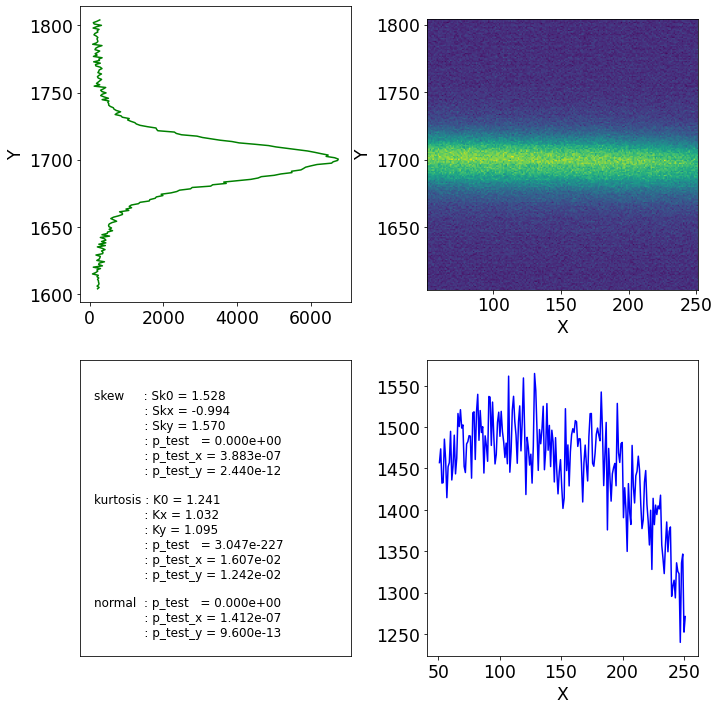

In [85]:
fig=plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0.12, right=0.95, wspace=0.3,
                    bottom=0.15, top=0.9)

ax=fig.add_subplot(222)
ax.imshow(thumbnail,origin="lower",extent=(int(x1)-WID,int(x1)+WID,int(y1)-WID,int(y1)+WID))
ax.set_xlabel("X")
ax.set_ylabel("Y")

ax=fig.add_subplot(221)
base = plt.gca().transData
rot = transforms.Affine2D().rotate_deg(-90)
#ax.plot(yy,thumbnail_y,"g",rotation=u'vertical')
ax.plot(-yy,thumbnail_y,"g",transform= rot + base)
ax.set_ylabel("Y")

ax=fig.add_subplot(224)
ax.plot(xx,thumbnail_x,"b")
ax.set_xlabel("X")
plt.tight_layout()

ax=fig.add_subplot(223)
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

ax.text(0.05, 0.9, skew_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.text(0.05, 0.55, kurt_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.text(0.05, 0.2, norm_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)

# Go for spectrum reconstruction

2021-06-08 17:17:20  spectractor.extractor.extractor Spectractor          INFO   
	Start SPECTRACTOR
2021-06-08 17:17:20  Image      load_AUXTEL_image    INFO   
	Loading AUXTEL image /sps/lsst/groups/auxtel/data/2021/ronchi170lpmm/FlipCleans/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_203.fits...
2021-06-08 17:17:20  Image      load_AUXTEL_image    INFO   
	Image loaded


Section: paths
x disperser_dir: extractor/dispersers/	=> parameters.DISPERSER_DIR: /sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/extractor/dispersers/	 <class 'str'>
x throughput_dir: simulation/AuxTelThroughput/	=> parameters.THROUGHPUT_DIR: /sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/simulation/AuxTelThroughput/	 <class 'str'>
Section: instrument
x obs_name: AUXTEL	=> parameters.OBS_NAME: AUXTEL	 <class 'str'>
x obs_altitude: 2.66299616375123	=> parameters.OBS_ALTITUDE: 2.66299616375123	 <class 'float'>
x obs_latitude: -30.2446389756252	=> parameters.OBS_LATITUDE: -30.2446389756252	 <class 'float'>
x obs_diameter: 1.20	=> parameters.OBS_DIAMETER: 1.2 m	 <class 'astropy.units.quantity.Quantity'>
x obs_epoch: J2000.0	=> parameters.OBS_EPOCH: J2000.0	 <class 'str'>
x obs_transmission_systematics: 0.005	=> parameters.OBS_TRANSMISSION_SYSTEMATICS: 0.005	 <c

2021-06-08 17:17:20  Image      load_image           INFO   
	Loading disperser ronchi170lpmm...
2021-06-08 17:17:20  Hologram   load_specs           INFO   
	Load disperser ronchi170lpmm:
	from /sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/extractor/dispersers/ronchi170lpmm
2021-06-08 17:17:20  Hologram   load_specs           INFO   
	Grating characteristics:
	N = 170.00 +/- 0.10 grooves/mm
	Average tilt of 0.0 degrees
2021-06-08 17:17:25  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.372883073271957 but average of self.read_out_noise is 8.5.
2021-06-08 17:17:26  TelescopeTransmission reset_lambda_range   INFO   
	With filter RG610, set parameters.LAMBDA_MIN=563 and parameters.LAMBDA_MAX=1095.
2021-06-08 17:17:26  urllib3.connectionpool _get_conn            DEBUG  Resetting dropped connection: simbad.u-strasbg.fr
2021-06-08 17:17:26  urllib3.conn

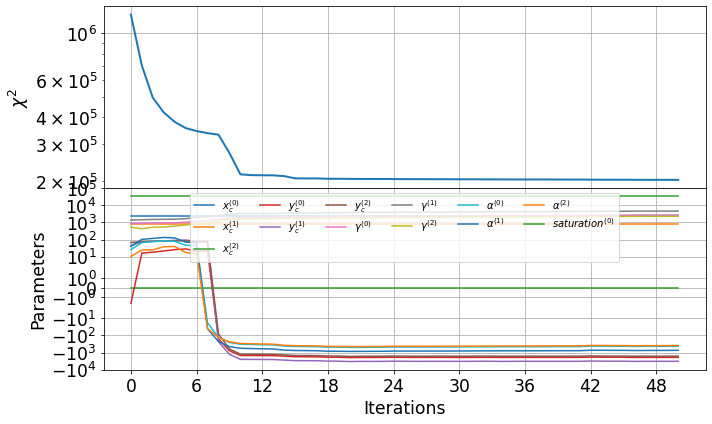

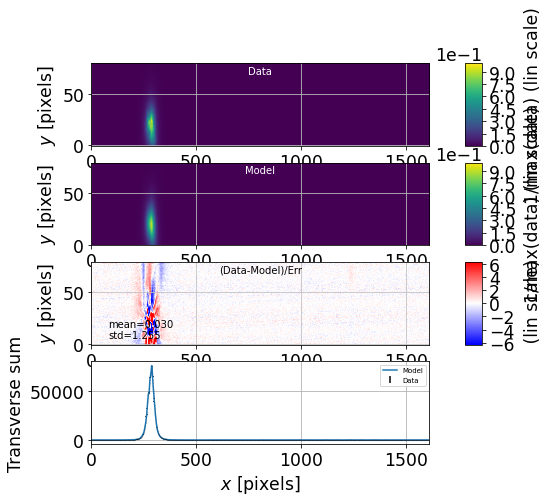

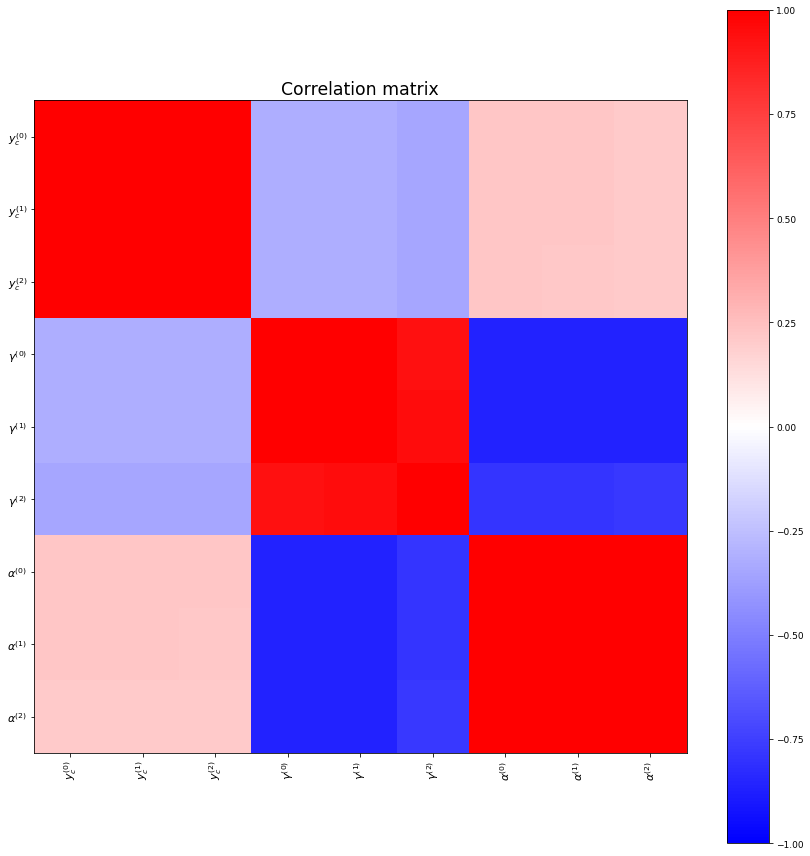

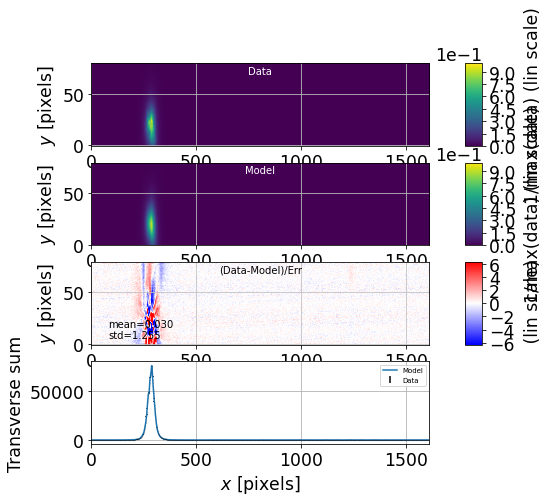

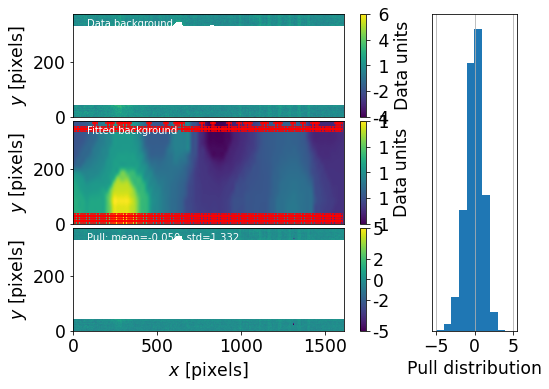

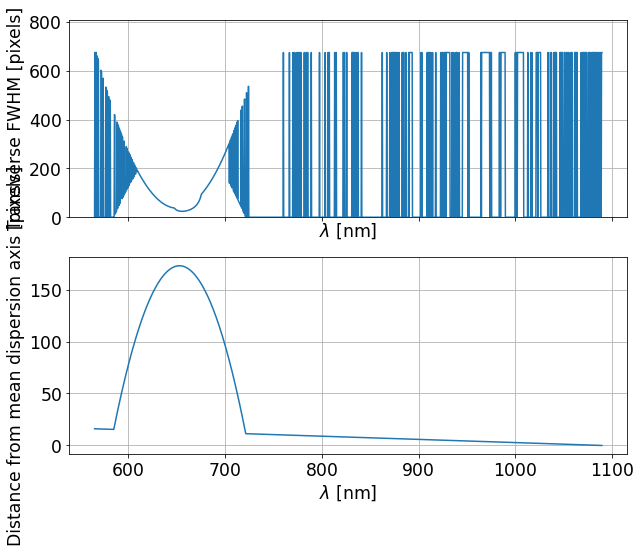

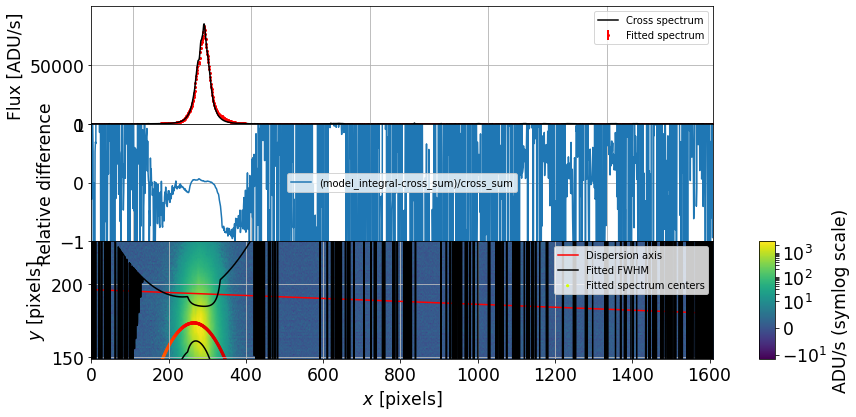

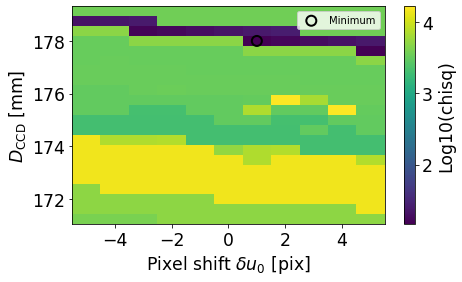

In [86]:
spectrum = Spectractor(filename, output_directory, guess=[x1,y1], target_label=target, disperser_label=disperser_label, config=config)